## Decision Tree

***Imports***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


**1. Leitura dos datasets já com Feature Engineering**

In [2]:
train_df = pd.read_csv("train_data_prepared.csv", encoding = "latin-1", keep_default_na = False, na_values = ['NULL', ''])
test_df = pd.read_csv("test_data_prepared.csv", encoding = "latin-1", keep_default_na = False, na_values = ['NULL', ''])

***Inspeção dos Dados***

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 1   AVERAGE_TIME_DIFF        6812 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 3   LUMINOSITY               6812 non-null   int64  
 4   AVERAGE_TEMPERATURE      6812 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 6   AVERAGE_HUMIDITY         6812 non-null   float64
 7   AVERAGE_WIND_SPEED       6812 non-null   float64
 8   AVERAGE_CLOUDINESS       6812 non-null   int64  
 9   RAIN_INTENSITY           6812 non-null   int64  
 10  record_date_year         6812 non-null   int64  
 11  record_date_month        6812 non-null   int64  
 12  record_date_day          6812 non-null   int64  
 13  record_date_hour         6812 non-null   int64  
 14  day_of_week             

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   LUMINOSITY               1500 non-null   int64  
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 6   AVERAGE_HUMIDITY         1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   AVERAGE_CLOUDINESS       1500 non-null   int64  
 9   RAIN_INTENSITY           1500 non-null   int64  
 10  record_date_year         1500 non-null   int64  
 11  record_date_month        1500 non-null   int64  
 12  record_date_day          1500 non-null   int64  
 13  record_date_hour         1500 non-null   int64  
 14  day_of_week             

In [5]:
print("Tamanho do treino:" ,train_df.shape)
print("Tamanho do teste:" ,test_df.shape)

Tamanho do treino: (6812, 33)
Tamanho do teste: (1500, 32)


***Separar as features e target***

In [6]:
X = train_df.drop(columns=["AVERAGE_SPEED_DIFF"])
y = train_df["AVERAGE_SPEED_DIFF"]

***Ver distribuição de classes***

Distribuição de classes:
AVERAGE_SPEED_DIFF
0    2200
2    1651
1    1419
3    1063
4     479
Name: count, dtype: int64

Distribuição percentual (%):
AVERAGE_SPEED_DIFF
0    32.295948
2    24.236641
1    20.830887
3    15.604815
4     7.031709
Name: proportion, dtype: float64


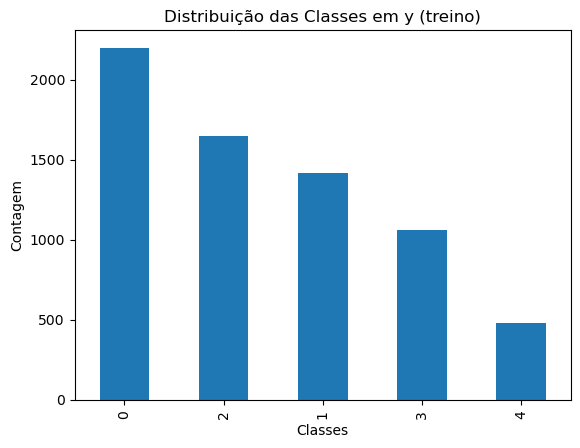

In [7]:
print("Distribuição de classes:")
print(y.value_counts())                 # contagem absoluta das classes

print("\nDistribuição percentual (%):")
print(y.value_counts(normalize=True) * 100)     # contagem percentual das classes

# gráfico da distribuição das classes no conjunto de treino
y.value_counts().plot(kind='bar')
plt.title("Distribuição das Classes em y (treino)")
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.show()

**2. Treino**

***Treino do Modelo Base***

In [8]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",   # tentar compensar classes desbalanceadas
    criterion="gini",

)


In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    dt_model,
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

In [10]:
print("Accuracy por fold:", cv_scores)
print("Accuracy média:", cv_scores.mean())
print("Desvio padrão:", cv_scores.std())

Accuracy por fold: [0.76522377 0.70432869 0.73861968 0.72907489 0.74155653]
Accuracy média: 0.7357607118270464
Desvio padrão: 0.019710451648755373


In [11]:
dt_model.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


**3. Análise dos resultados**

***Feature Importance***

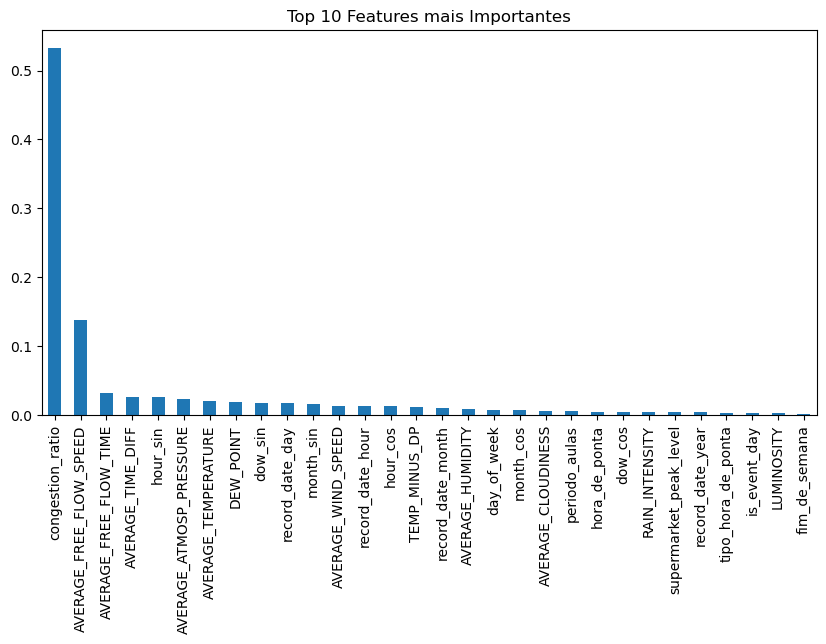

In [12]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns)       # importância atribuída a cada feature
importances = importances.sort_values(ascending=False)                  # ordenação das features por importância

plt.figure(figsize=(10, 5))
importances.head(30).plot(kind="bar")                 # gráfico das features mais relevantes
plt.title("Top 10 Features mais Importantes")
plt.show()

***Previsão no test set***

In [13]:
y_test_pred = dt_model.predict(test_df)


**4. Gerar submissão**

***Mapear classes de volta para o label e gerar o ficheiro de submissão***

In [14]:
reverse_mapping = {
    0: "None",
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very_High"
}

y_test_labels = pd.Series(y_test_pred).map(reverse_mapping)

submission = pd.DataFrame({
    "RowId": range(1, len(test_df) + 1),
    "Speed_Diff": y_test_labels
})

submission.to_csv("submission.csv", index=False)
print("Ficheiro 'submission.csv' criado com sucesso!")


Ficheiro 'submission.csv' criado com sucesso!


*Accuracy no kaggle: 0.74888*